# Employee data analysis and churn prediction

## Objective

The aim of this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

## About the dataset

Data source: [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

This dataset contains columns: Satisfactory Level, Number of Project, Average Monthly Hours, Time Spend Company, Promotion Last 5 Years, Department, Salary.

there are 14,999 rows, 10 columns, and these variables: 


Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Examining data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

Loading our dataset:

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Let's Gather basic information about the data

In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Descriptive statistics:

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Cleaning

#### Missing values check

In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

As we can see, there are no missing values in the data. But what about duplicates?

#### Duplicate entries check

In [7]:
df.duplicated().sum()

3008

So, there are 3008 rows containing duplicated data, thats about 20% of all entries. Let's get rid of them:

In [8]:
df = df.drop_duplicates(keep='first')
print('Current shape: ', df.shape)
df.head()

Current shape:  (11991, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Columns rename

Now, let's rename some columns that are eather <b>misspeled</b>, not in a <b>snake_case</b> or need a more <b>concise</b> name.

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### Check the outliers

Let's build some boxplots to visualize distribution of `number_project`, `average_monthly_hours` and `tenure`.

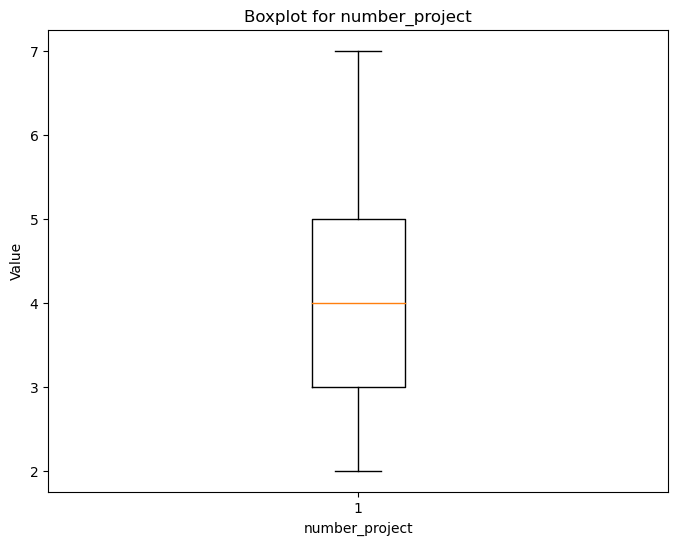

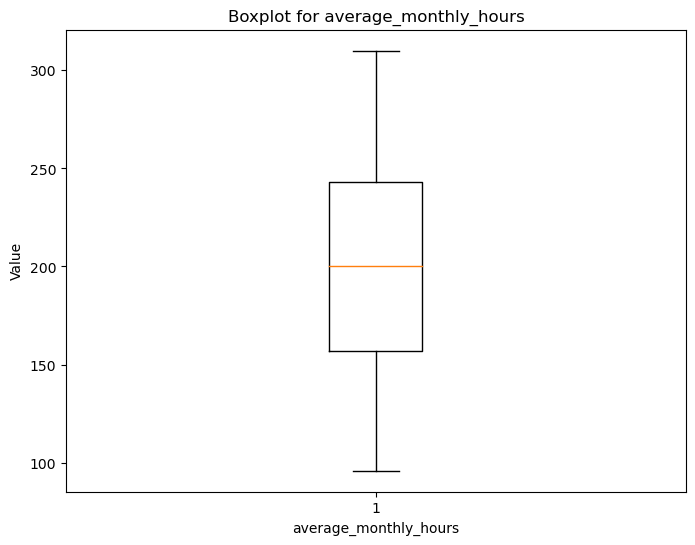

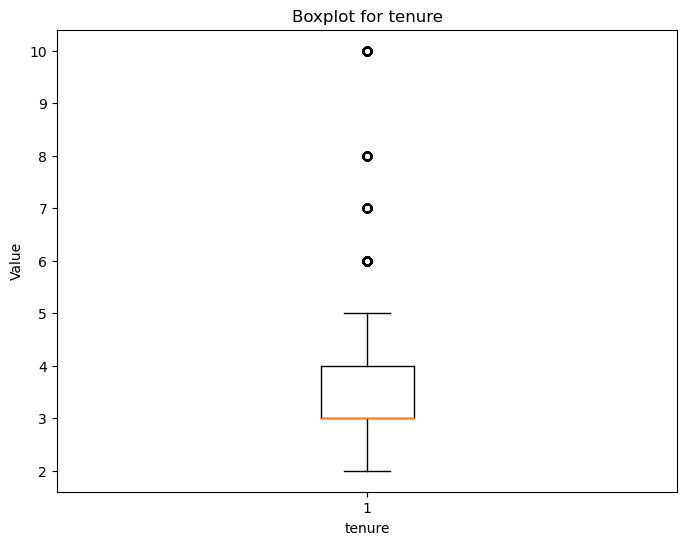

In [11]:
filtered_columns = df[['number_project', 'average_monthly_hours', 'tenure']]
for column in filtered_columns.columns:  
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot for {column}')
    plt.boxplot(filtered_columns[column])
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

So, as we can see, there are some outliers in tenure variable.
It would be helpful to investigate how many rows in the data contain outliers in the tenure column.

In [12]:
percentile25 = df['tenure'].quantile(0.25)
percentile75 = df['tenure'].quantile(0.75)

# interquartile range
iqr = percentile75 - percentile25

# Defining the upper limit and lower limit for non-outlier values in tenure column
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identifining subset of data containing outliers
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

# Counting how many rows in the data contain outliers
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


For now let's just keep them.

### Exploratory data analysis

Let's calculate how many people who left vs. stayed:

In [13]:
print('Number of people who left/stayed: ')
print(df['left'].value_counts())
print('\nPercentage of people who left/stayed: ')
print(df['left'].value_counts(normalize=True))

Number of people who left/stayed: 
0    10000
1     1991
Name: left, dtype: int64

Percentage of people who left/stayed: 
0    0.833959
1    0.166041
Name: left, dtype: float64


#### Data Visualization

##### Correlation Heatmap

Let's create a heatmap to see any correlations in our data.

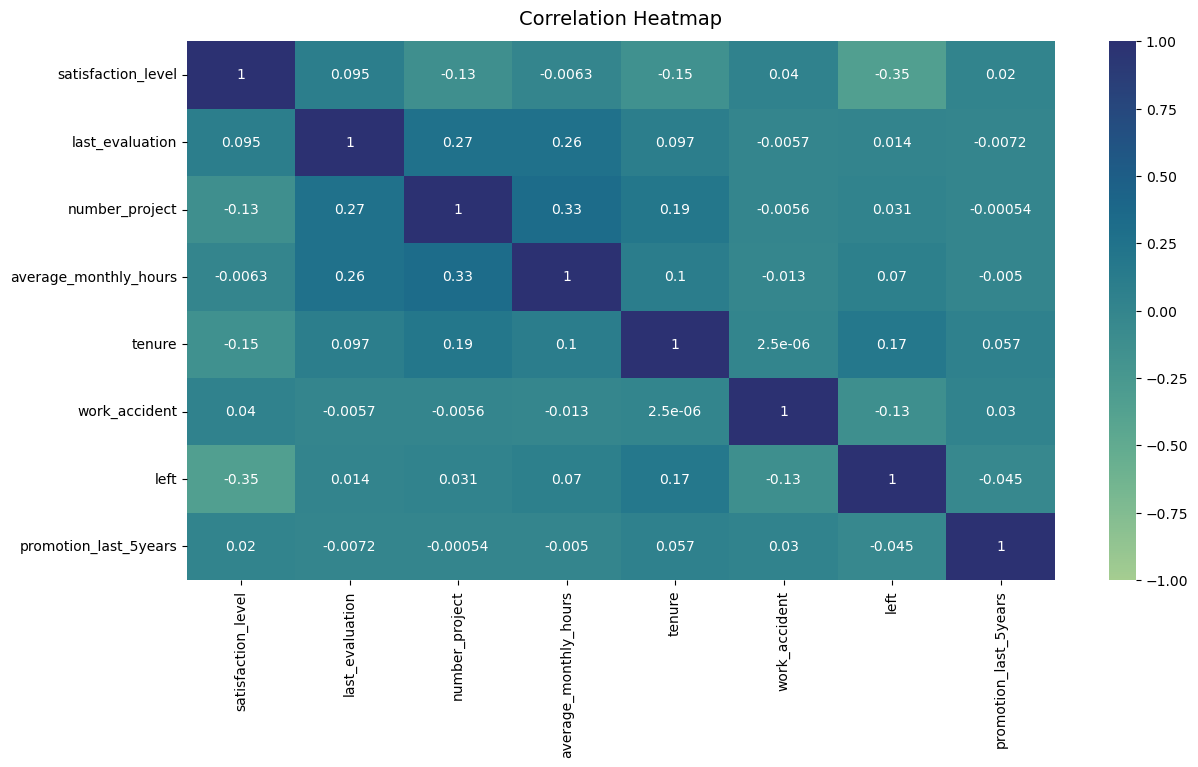

In [14]:
plt.figure(figsize=(14, 7))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("crest", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap indicates that there are positive correlations among the number of projects, monthly hours, and evaluation scores, while the likelihood of an employee leaving is inversely correlated with their satisfaction level.

##### Monthly hours by number of projects

Let's explore those variables further by creating stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

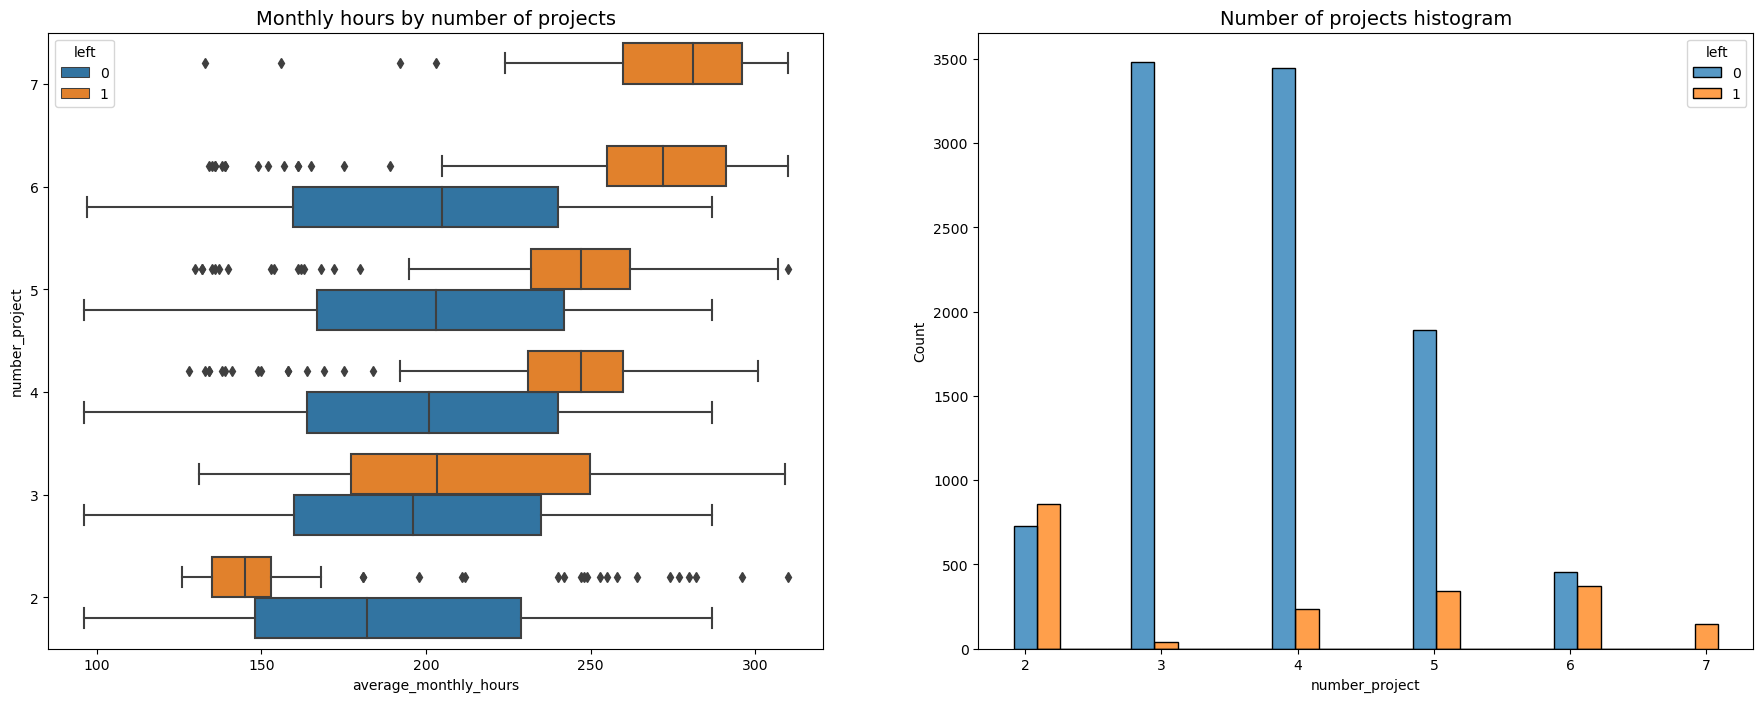

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')
tenure_stay = df[df['left']==0]['number_project']
tenure_left = df[df['left']==1]['number_project']
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')
plt.show()

It is conceivable that individuals who are engaged in a greater number of projects would naturally invest more hours in their work. This pattern appears evident in the data, as the average weekly hours for both the 'stayed' and 'left' groups tend to increase with the number of projects they were involved in. Nevertheless, several noteworthy observations can be made from this analysis:

* Within the group of employees who left the company, two distinct subgroups emerge: (A) those who worked significantly fewer hours than their peers with a similar number of projects, and (B) those who worked considerably more. In the case of group A, it's plausible that some may have been terminated, while others could have been individuals who had already given notice and had reduced work hours as a result. Group B likely comprises employees who voluntarily resigned, possibly because they were highly influential contributors to their projects.

* A peculiar trend arises with employees who were assigned seven projects; all of them eventually left the company. Additionally, the interquartile ranges for this group and those who left with six projects were notably higher, ranging from approximately 255 to 295 hours per week, far exceeding other groups.

* The ideal workload for employees appears to be in the range of 3 to 4 projects, as the ratio of those who left to those who stayed is significantly lower within these cohorts.

* Assuming a standard workweek of 40 hours and two weeks of annual vacation, the average monthly working hours for employees working from Monday to Friday would be around 166.67 hours. Remarkably, aside from employees working on two projects, every other group, including those who remained with the company, consistently logged significantly more hours than this benchmark. This suggests that employee overwork may be a prevailing issue within the organization.

##### Satisfaction levels based on employee tenure

Exploring a visualization of satisfaction levels based on employee tenure could provide valuable insights.

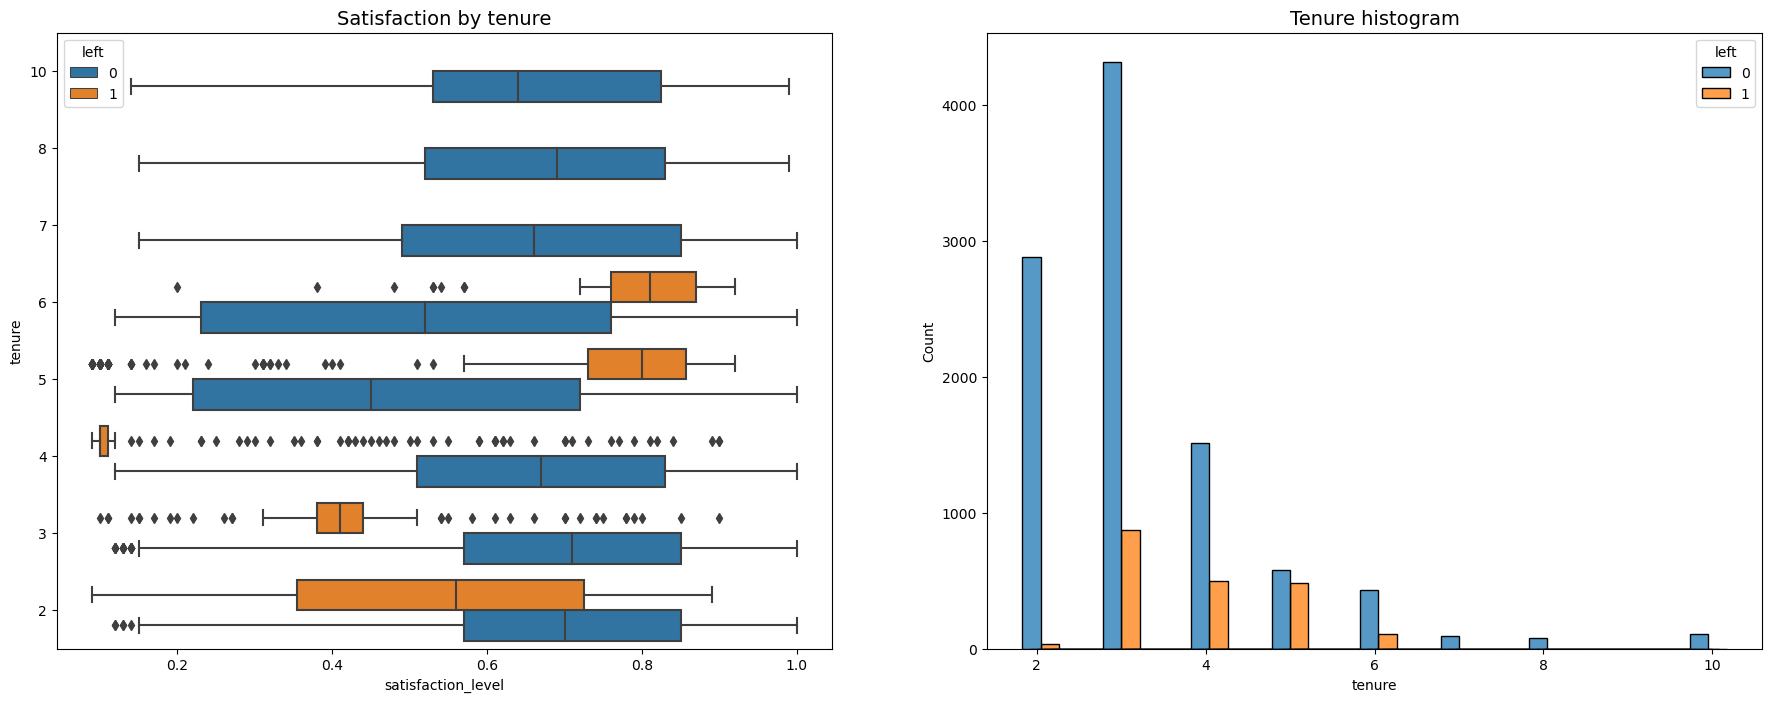

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')
tenure_stay = df[df['left']==0]['tenure']
tenure_left = df[df['left']==1]['tenure']
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')
plt.show()

* Departing employees can be categorized into two main groups: those with shorter tenures who expressed dissatisfaction and those with medium-length tenures who reported very high satisfaction.
* Notably, employees with four years of tenure who left the company exhibit an unusually low level of satisfaction. It would be prudent to investigate any company policy changes or factors that might have disproportionately affected individuals at the four-year mark, if such data is available.
* Remarkably, the employees with the longest tenures opted to stay, and their satisfaction levels align closely with those of newer employees who also chose to remain.
* The histogram illustrates that there is a relatively small population of employees with longer tenures. This could imply that they hold higher-ranking or higher-paying positions within the organization.

##### Salary levels for different tenures.

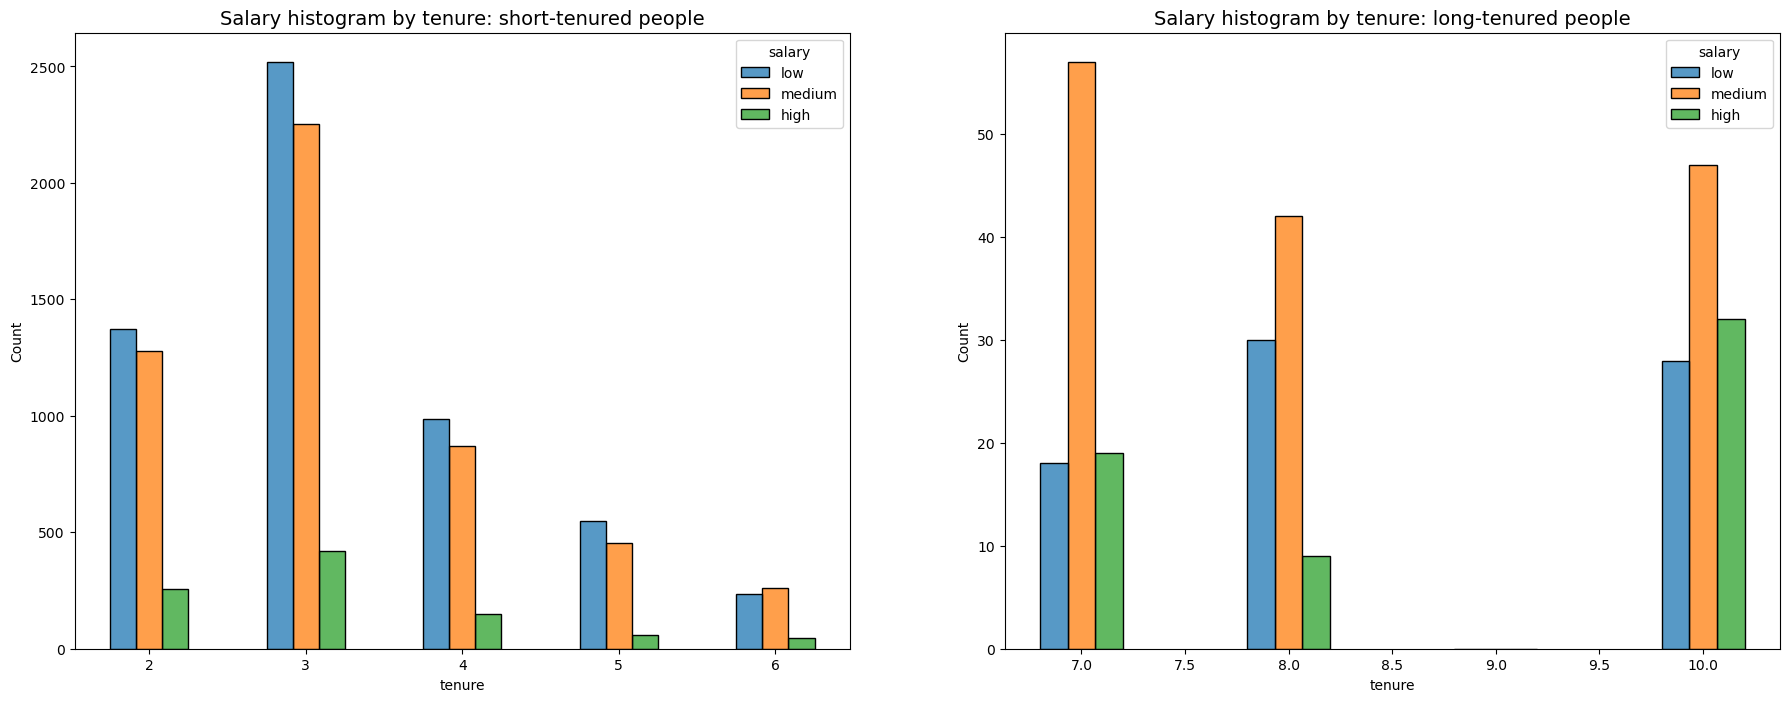

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
tenure_short = df[df['tenure'] < 7]
tenure_long = df[df['tenure'] > 6]
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

This plot indicate that employees with longer tenures were not predominantly composed of individuals with higher salaries. 

Let's investigate whether there is a correlation between working extended hours and receiving high evaluation scores. We can generate a scatterplot comparing average_monthly_hours and last_evaluation

##### Monthly hours by last evaluation score

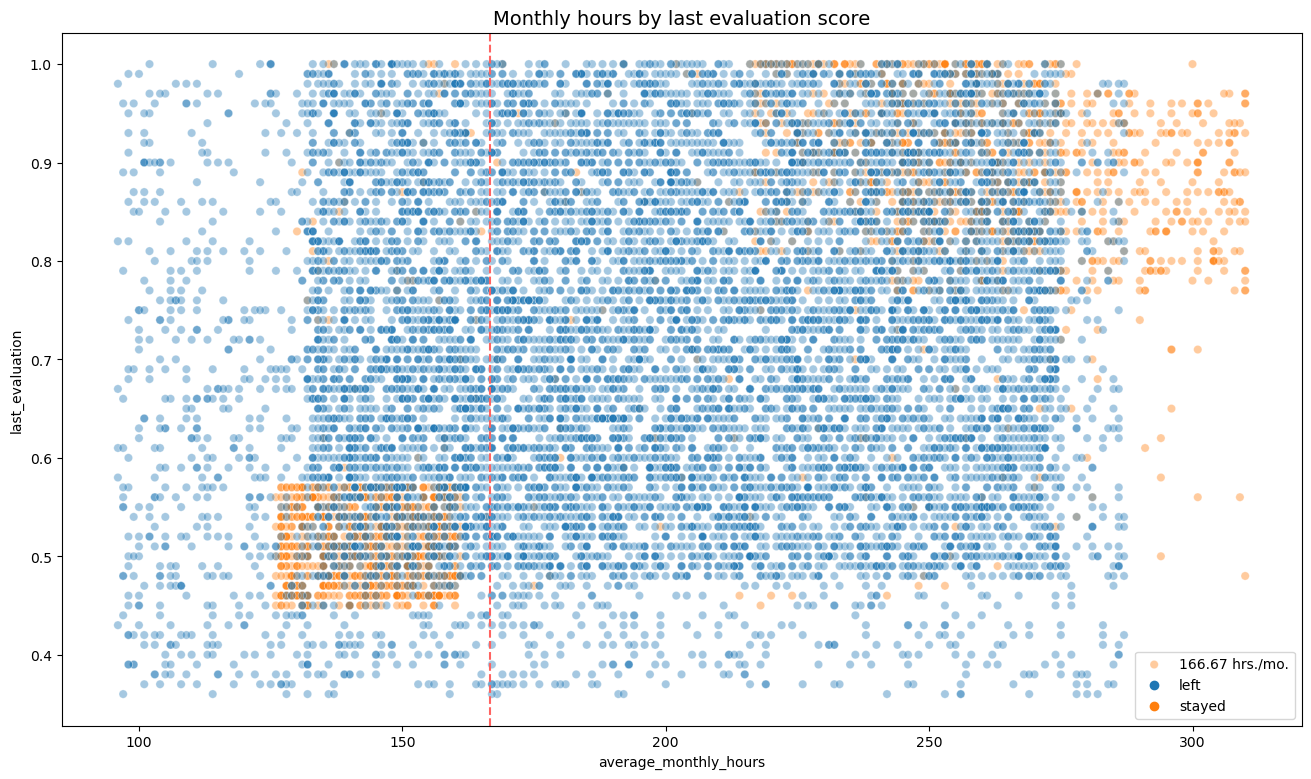

In [18]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

* The scatterplot reveals two distinct categories of departing employees: one group includes those who were overworked yet achieved high performance evaluations, while the other consists of employees who worked slightly below the nominal monthly average of 166.67 hours and received lower evaluation scores.
* It appears that there is a correlation between the number of hours worked and the evaluation score.
* However, it's important to note that there isn't a substantial proportion of employees in the upper left quadrant of this plot, signifying that working long hours doesn't guarantee a favorable evaluation score.
* Interestingly, a majority of employees within the company tend to work well beyond the 167-hour-per-month threshold.

##### Counts of stayed/left by department

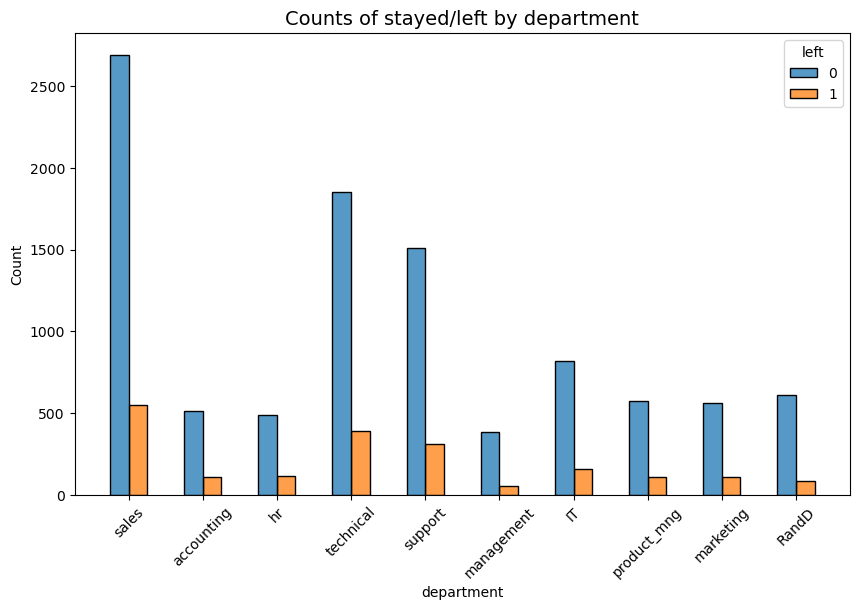

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

It appears that there are no departments that significantly differ in the proportion of employees who left compared to those who chose to stay.

## Preparation for ML

I chose to go with Decision Tree and Random Forest models. However, since the task is basically a binomial classification, logistic regression will also do quite well.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn import metrics as mcs

### Encoding

Before splitting the data to training, testing and validating sets, we need to encode our catigorical variables `department` and `salary`. But since `salary` is ordinal variable it's better not to dummy this column, but rather to convert the levels to numbers.

In [21]:
df_ = df.copy()

# encoding salary:
df_['salary'] = df_['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

# dummy encoding department column:
df_ = pd.get_dummies(df_, drop_first=False)

df_.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Features & Target Selection

In [22]:
X = df_.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
y = df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

### Splitting Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

## Decision Tree

Let's employ a decision tree model and establish a cross-validated grid search to thoroughly explore the optimal model parameters.

In [25]:
tree_ = DecisionTreeClassifier()
cv_params = {'max_depth':[2, 4, 6, 8, 10, 12, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
tree = GridSearchCV(tree_, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fitting model to training data:

In [27]:
%%time
tree.fit(X_train, y_train)

CPU times: total: 14.4 s
Wall time: 15.4 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'accuracy', 'recall', 'roc_auc', 'f1'})

Determining the most suitable values for the decision tree parameters:

In [28]:
tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

### Evaluation

Checking best AUC score on cross validation:

In [29]:
tree.best_score_

0.9702966366073604

That's quite an impressive score! Which indicates that the model is highly effective at predicting which employees are likely to leave the company.

Let's make a DataFrame specifically for containing models' evaluation scores:

In [30]:
def make_results(model_name:str, model_object, metric:str):
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
    return table

In [31]:
tree_res = make_results('decision tree cv', tree, 'auc')
tree_res

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.920116,0.91024,0.915119,0.971978,0.970297


Let's write a function that gets all the scores from a model's predictions:

In [32]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
    return table

Now we can get predictions from our test data

In [47]:
tree_test = get_scores('decision tree test', tree, X_test, y_test)
print(tree_res)
print(tree_test)

              model  precision   recall        F1  accuracy       auc
0  decision tree cv   0.920116  0.91024  0.915119  0.971978  0.970297
                model  precision    recall        f1  accuracy       AUC
0  decision tree test   0.937888  0.909639  0.923547  0.974983  0.948819


As we can see the result on the test data got a little bit worse, but not significantly. The AUC score is still pretty good.

### Feature importances

In [34]:
tree_importances = pd.DataFrame(tree.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree_importances = tree_importances.sort_values(by='gini_importance', ascending=False)
tree_importances = tree_importances[tree_importances['gini_importance'] != 0]
tree_importances

,gini_importance
satisfaction_level,0.514994
last_evaluation,0.174168
number_project,0.126449
tenure,0.126069
average_monthly_hours,0.058320


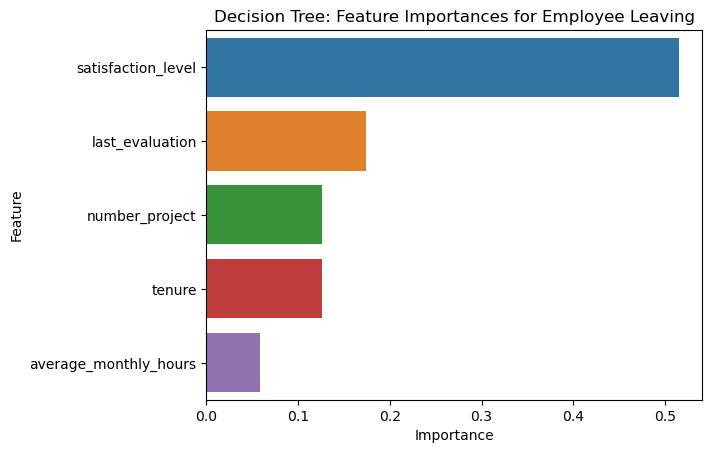

In [35]:
sns.barplot(data=tree_importances, x="gini_importance", y=tree_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### Decision Tree Plot

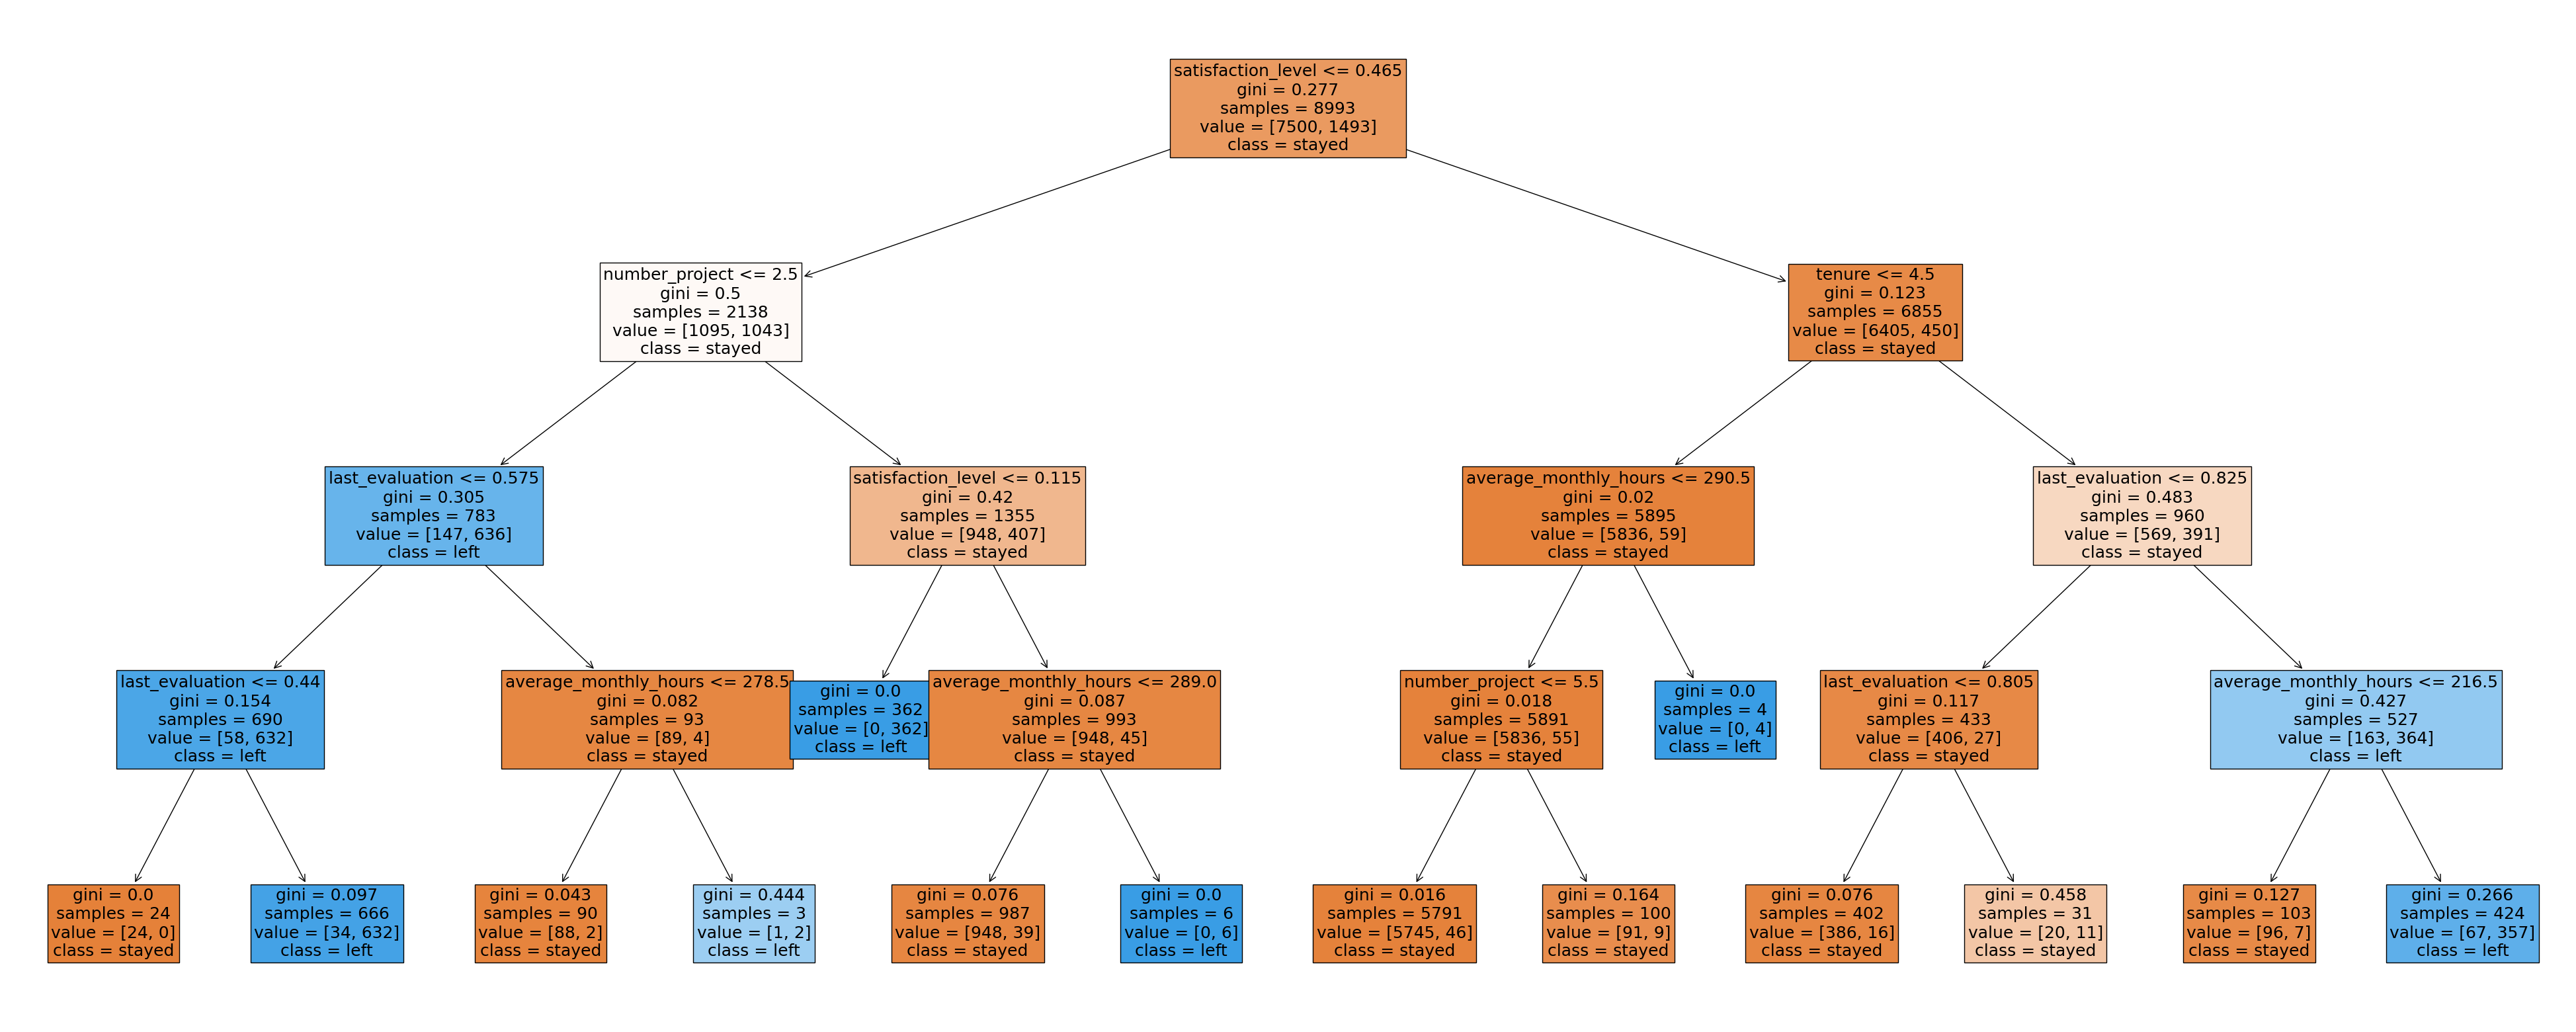

In [36]:
plt.figure(figsize=(50,20))
plot_tree(tree.best_estimator_, max_depth=6, fontsize=18, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

Click twice on a diagram to see the details.

## Random Forest

Now, let's build a random forest model and establish a cross-validated grid search to thoroughly explore the best model parameters.

In [39]:
rf_ = RandomForestClassifier()
cv_params = {'max_depth': [3, 5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf = GridSearchCV(rf_, cv_params, scoring=scoring, cv=4, refit='roc_auc', n_jobs=-1)

Fitting random forest model to training data:

In [40]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 8.56 s
Wall time: 23min 39s


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'precision', 'accuracy', 'recall', 'roc_auc', 'f1'})

Best AUC score achived by random forest:

In [41]:
rf.best_score_

0.9799365113044974

Determine the optimal parameter values for the random forest model.

In [42]:
rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

### Evaluation

#### Confusion matrix

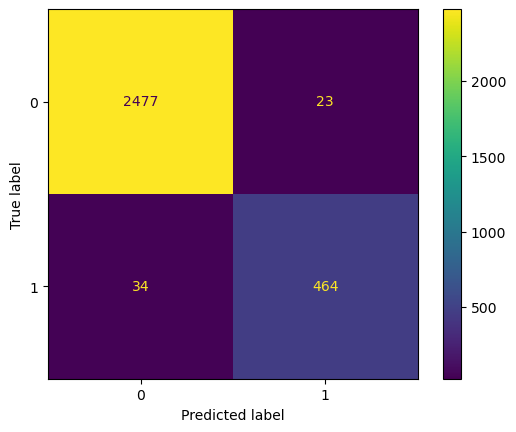

In [53]:
preds = rf.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(values_format='');

In [44]:
rf_res = make_results('random forest cv', rf, 'auc')
rf_res

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.951944,0.911575,0.931183,0.977649,0.979937


In [54]:
rf_test = get_scores('random forest1 test', rf, X_test, y_test)

#### Model comparison

In [51]:
print(rf_res)
print(rf_test)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.951944  0.911575  0.931183  0.977649  0.979937
                 model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.952772  0.931727  0.942132  0.980987  0.961263


Surprisingly, the test scores are better for every metric except AUC, which also is not critical.

Let's compare both models:

In [50]:
print(tree_test)
print(rf_test)

                model  precision    recall        f1  accuracy       AUC
0  decision tree test   0.937888  0.909639  0.923547  0.974983  0.948819
                 model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.952772  0.931727  0.942132  0.980987  0.961263


As we can see, random forest model is better than decision tree in every evaluation metric. But since our primary metric is AUC, let's judge by it. The difference is 1.3 percent in favour of random forest. 

This seems to be a robust model. Since this test set was exclusively utilized for this model, you can have greater confidence that its performance on this dataset accurately reflects how it will perform on fresh, unseen data.

#### Feature importances

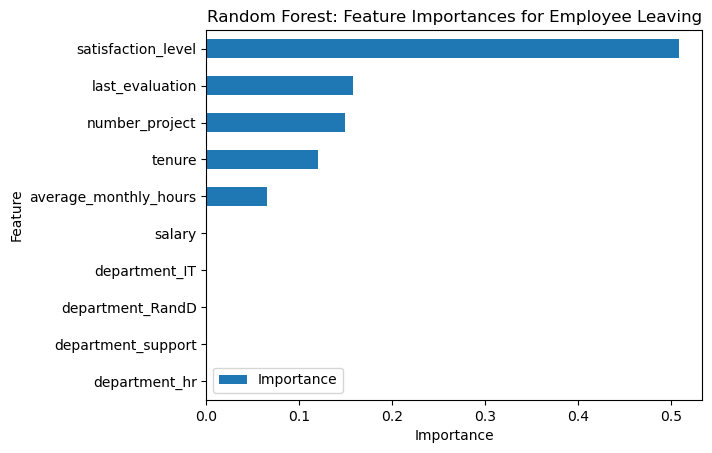

In [55]:
feat_impt = rf.best_estimator_.feature_importances_
ind = np.argpartition(rf.best_estimator_.feature_importances_, -10)[-10:]
feat = X.columns[ind]
feat_impt = feat_impt[ind]
y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)
y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")
ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above illustrates that in this random forest model, the most influential features, in descending order of importance, are `satisfaction_level`, `last_evaluation`, `number_project`, `tenure`, and `average_monthly_hours`. These variables play a crucial role in predicting the target variable, <b>`left`</b>, and interestingly, they align with the key features identified by the decision tree model.

## Summary

The decision tree model achieved the following metrics on the test set:

AUC of 94.9%, precision of 93.8%, recall of 91%, f1-score of 92.3%, and accuracy of 97.5%.

Notably, the random forest model exhibited a slight improvement over the performance of the decision tree model by achiving:

AUC of 96.1%, precision of 95.2%, recall of 93.1%, f1-score of 94.2%, and accuracy of 98.1%.